In [92]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from collections import Counter
from tqdm import tqdm
from hanspell import spell_checker

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
import warnings
# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

### 한글폰트 깨짐
https://mindscale.kr/course/python-visualization-basic/font/

In [18]:
# !apt-get install -y fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist


['/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf']

In [27]:
path = '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf' # fontlist에 있던 경로입니다
font_name = fm.FontProperties(fname=path).get_name()
font_name
plt.rcParams['font.family'] =font_name
plt.rcParams['axes.unicode_minus'] =False

# 데이터 확인

### 데이터 불러오기

In [6]:
train_df=pd.read_csv('../data/train.csv')

In [7]:
train_df.head()

,ID,input_text,label_text,target,predefined_news_category,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화,3,IT과학,"{'annotators': ['08', '13', '07'], 'annotations': {'first-scope': ['생활문화', '생활문화', 'IT과학'], 'second-scope': ['IT과학', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}",https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=227&oid=001&aid=0008508947,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 막따가 흐려저…남부지방 여튼 황사,생활문화,3,생활문화,"{'annotators': ['14', '13', '07'], 'annotations': {'first-scope': ['생활문화', '생활문화', '생활문화'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}",https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=103&sid2=248&oid=001&aid=0008384783,2016.05.08. 오전 5:25
2,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,3,생활문화,"{'annotators': ['14', '13', '07'], 'annotations': {'first-scope': ['생활문화', '생활문화', '생활문화'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}",https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=103&sid2=248&oid=001&aid=0008384783,2016.05.08. 오전 5:25
3,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회,2,IT과학,"{'annotators': ['14', '13', '10'], 'annotations': {'first-scope': ['사회', '사회', '사회'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}",https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=228&oid=001&aid=0008254585,2016.03.15. 오후 12:00
4,ynat-v1_train_00003,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회,2,IT과학,"{'annotators': ['16', '11', '15'], 'annotations': {'first-scope': ['사회', 'IT과학', '사회'], 'second-scope': ['해당없음', '해당없음', 'IT과학'], 'third-scope': ['해당없음', '해당없음', '경제']}}",https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=228&oid=001&aid=0009070646,2017.02.28. 오전 9:54


### 결측치 확인

In [8]:
train_df.isnull().sum()

ID                          0
input_text                  0
label_text                  0
target                      0
predefined_news_category    0
annotations                 0
url                         0
date                        0
dtype: int64

`확인 결과 결측치 없음`

### 중복값 확인

치팅

In [165]:
print('원래 데이터 개수: ',len(train_df))
df_f_text = train_df[['ID']].drop_duplicates().index
print('중복 제거된 데이터 개수: ',len(train_df)-len(df_f_text))

원래 데이터 개수:  52530
중복 제거된 데이터 개수:  6852


`ID만 똑같은 개수 `**6852**`개`

In [9]:
print('원래 데이터 개수: ',len(train_df))
df_f = train_df[['ID','input_text','label_text','target','predefined_news_category','annotations']].drop_duplicates().index
print('중복 제거된 데이터 개수: ',len(train_df)-len(df_f))

원래 데이터 개수:  52530
중복 제거된 데이터 개수:  156


In [167]:
print('원래 데이터 개수: ',len(train_df))
df_f_text = train_df[['input_text','label_text']].drop_duplicates().index
print('중복 제거된 데이터 개수: ',len(train_df)-len(df_f_text))

원래 데이터 개수:  52530
중복 제거된 데이터 개수:  156


`label까지 똑같은 개수 `**156**`개`

In [166]:
print('원래 데이터 개수: ',len(train_df))
df_f_text = train_df[['input_text']].drop_duplicates().index
print('중복 제거된 데이터 개수: ',len(train_df)-len(df_f_text))

원래 데이터 개수:  52530
중복 제거된 데이터 개수:  1527


`input text까지 똑같은 개수 `**1527**`개`

### label별 데이터 분포

7


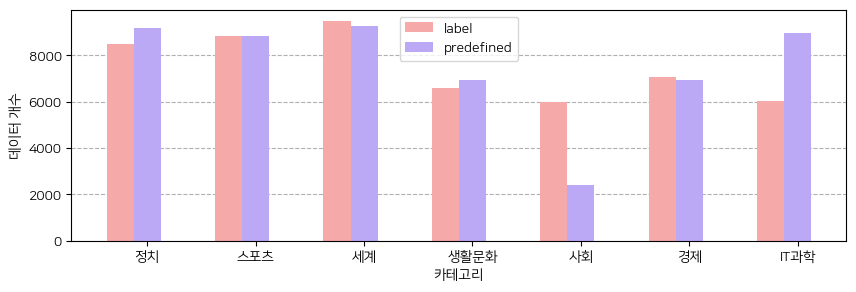

In [91]:
fig, axes = plt.subplots(figsize=(10,3))
plt.grid(visible=True, axis='y', linestyle='--', zorder=0)

counter = Counter(train_df.label_text)
counter = dict(sorted(counter.items()))
x = list(counter.keys())[::-1]
y = list(counter.values())[::-1]
print(len(x))

counter = Counter(train_df.predefined_news_category)
counter = dict(sorted(counter.items()))
x = list(counter.keys())[::-1]
y2 = list(counter.values())[::-1]

bar_width = 0.25

index = np.arange(7)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, y, bar_width, color='#F5A9A9', label='label', zorder=2)

b2 = plt.bar(index + bar_width, y2, bar_width,color='#BCA9F5', label='predefined', zorder=2)
plt.xticks(np.arange(bar_width, len(x) + bar_width, 1), x)

plt.xlabel('카테고리', size = 10)
plt.ylabel('데이터 개수', size = 10)
plt.legend()
plt.show()


predefined랑 label이랑 다른 경우

In [158]:
diff = ex[train_df['label_text'] != train_df['predefined_news_category']]
print(len(diff))
diff.head(10)

10089


,label_text,refactor_label,predefined_news_category,annotations
0,생활문화,생활문화,IT과학,"{'annotators': ['08', '13', '07'], 'annotations': {'first-scope': ['생활문화', '생활문화', 'IT과학'], 'second-scope': ['IT과학', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
3,사회,사회,IT과학,"{'annotators': ['14', '13', '10'], 'annotations': {'first-scope': ['사회', '사회', '사회'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
4,사회,사회,IT과학,"{'annotators': ['16', '11', '15'], 'annotations': {'first-scope': ['사회', 'IT과학', '사회'], 'second-scope': ['해당없음', '해당없음', 'IT과학'], 'third-scope': ['해당없음', '해당없음', '경제']}}"
9,생활문화,생활문화,사회,"{'annotators': ['03', '10', '09'], 'annotations': {'first-scope': ['생활문화', '생활문화', '사회'], 'second-scope': ['해당없음', '해당없음', '생활문화'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
10,생활문화,생활문화,사회,"{'annotators': ['03', '10', '09'], 'annotations': {'first-scope': ['생활문화', '생활문화', '사회'], 'second-scope': ['해당없음', '해당없음', '생활문화'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
18,경제,경제,IT과학,"{'annotators': ['02', '08', '12'], 'annotations': {'first-scope': ['경제', '경제', 'IT과학'], 'second-scope': ['사회', 'IT과학', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
19,정치,정치,세계,"{'annotators': ['02', '11', '10'], 'annotations': {'first-scope': ['정치', '정치', '생활문화'], 'second-scope': ['세계', '생활문화', '해당없음'], 'third-scope': ['생활문화', '사회', '해당없음']}}"
20,사회,사회,IT과학,"{'annotators': ['03', '16', '10'], 'annotations': {'first-scope': ['사회', '사회', '사회'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
25,세계,세계,IT과학,"{'annotators': ['18', '10', '03'], 'annotations': {'first-scope': ['세계', '세계', '세계'], 'second-scope': ['IT과학', '해당없음', '사회'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
29,사회,사회,정치,"{'annotators': ['14', '03', '02'], 'annotations': {'first-scope': ['사회', '사회', '정치'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"


## 맞춤법 확인 (G2P)
맞춤법 틀린 문장은 5,481개(이론대로라면)

In [160]:
# hanspell
snet = '어버이날 막따가 흐려저…남부지방 여튼 황사	'
spelled_sent = spell_checker.check(snet)
print(spelled_sent)
print(spelled_sent.errors)
checked_sent = spelled_sent.checked
print(checked_sent)

# hanspell


Checked(result=True, original='어버이날 막따가 흐려저…남부지방 여튼 황사\t', checked='어버이날 막다가 흐려 저…남부 지방 여하튼 황사\t', errors=3, words=OrderedDict([('어버이날', 1), ('막다가', 1), ('흐려', 2), ('저…남부', 2), ('지방', 2), ('여하튼', 1), ('황사\t', 0)]), time=0.03162813186645508)
3
어버이날 막다가 흐려 저…남부 지방 여하튼 황사	


In [176]:
# hanspell
snet = '손안에'
spelled_sent = spell_checker.check(snet)
print(spelled_sent)
print(spelled_sent.errors)
checked_sent = spelled_sent.checked
print(checked_sent)

Checked(result=True, original='손안에', checked='손안에', errors=0, words=OrderedDict([('손안에', 0)]), time=0.0207211971282959)
0
손안에


In [168]:
def spell(x):
    spelled_sent = spell_checker.check(x)
    # count.most_common()
    return spelled_sent.errors
    

In [169]:
ex = train_df[['ID','input_text']].copy()
ex.insert(2,'errors',ex['input_text'].apply(spell))
ex.head(10)

,ID,input_text,errors
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,0
1,ynat-v1_train_00001,어버이날 막따가 흐려저…남부지방 여튼 황사,3
2,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,1
3,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,2
4,ynat-v1_train_00003,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,0
5,ynat-v1_train_00004,회새긴간 작까 김동시 걍심꼬백 뜽 새 소설집 뚜권 출간,6
6,ynat-v1_train_00004,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,1
7,ynat-v1_train_00005,야외서 생방송 하세요…액션캠 전용 요금제 잇따라,0
8,ynat-v1_train_00006,월드컵 태극전사 16강 전초기지 레오강 입성종합,2
9,ynat-v1_train_00007,미세먼지 속 출근길,0


In [170]:
diff = ex[ex['errors'] >0 ]
print(len(diff))
diff.head(10)

33221


,ID,input_text,errors
1,ynat-v1_train_00001,어버이날 막따가 흐려저…남부지방 여튼 황사,3
2,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,1
3,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,2
5,ynat-v1_train_00004,회새긴간 작까 김동시 걍심꼬백 뜽 새 소설집 뚜권 출간,6
6,ynat-v1_train_00004,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,1
8,ynat-v1_train_00006,월드컵 태극전사 16강 전초기지 레오강 입성종합,2
11,ynat-v1_train_00008,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,2
14,ynat-v1_train_00011,정진석 이정현 당현실 냉정하게 봐야…물러나는게 좋다종합,3
16,ynat-v1_train_00013,황재균 쐐기타…kt 갈 길 바쁜 삼성에 고춧가루,1
17,ynat-v1_train_00014,정상회담 D1 文대통령 취임 후 남북관계 주요 일지,2


## 잘못된 라벨 확인

In [134]:
A =  Counter(['생활문화', '생활문화', 'IT과학'])
print(A)
print(A.most_common())
A =  Counter(['생활문화', '생활문화', '생활문화'])
print(A)
print(A.most_common())
A =  Counter(['경제', '생활문화', 'IT과학'])
print(A)
print(A.most_common())

Counter({'생활문화': 2, 'IT과학': 1})
[('생활문화', 2), ('IT과학', 1)]
Counter({'생활문화': 3})
[('생활문화', 3)]
Counter({'경제': 1, '생활문화': 1, 'IT과학': 1})
[('경제', 1), ('생활문화', 1), ('IT과학', 1)]


### 첫번째에서 잘못된 라벨 확인

In [123]:
def majority(x):
    ano = x[1]
    count = Counter(eval(ano)['annotations']['first-scope'])
    # count.most_common()
    return count.most_common()[0][0]

In [124]:
ex = train_df[['label_text','predefined_news_category','annotations']].copy()
ex.insert(1,'first',ex[['label_text','annotations']].apply(majority, axis=1))
# ex['first'] = ex[['label_text','annotations']].apply(majority, axis=1)
# df
ex.head()

,label_text,first,predefined_news_category,annotations
0,생활문화,생활문화,IT과학,"{'annotators': ['08', '13', '07'], 'annotations': {'first-scope': ['생활문화', '생활문화', 'IT과학'], 'second-scope': ['IT과학', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
1,생활문화,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotations': {'first-scope': ['생활문화', '생활문화', '생활문화'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
2,생활문화,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotations': {'first-scope': ['생활문화', '생활문화', '생활문화'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
3,사회,사회,IT과학,"{'annotators': ['14', '13', '10'], 'annotations': {'first-scope': ['사회', '사회', '사회'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
4,사회,사회,IT과학,"{'annotators': ['16', '11', '15'], 'annotations': {'first-scope': ['사회', 'IT과학', '사회'], 'second-scope': ['해당없음', '해당없음', 'IT과학'], 'third-scope': ['해당없음', '해당없음', '경제']}}"


In [130]:
first_majority = ex[ex['label_text'] != ex['first']]
print(len(first_majority))
first_majority.head(10)

1371


,label_text,first,predefined_news_category,annotations
54,경제,사회,생활문화,"{'annotators': ['11', '07', '16'], 'annotations': {'first-scope': ['정치', '사회', '사회'], 'second-scope': ['사회', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
120,IT과학,사회,생활문화,"{'annotators': ['03', '14', '13'], 'annotations': {'first-scope': ['생활문화', '사회', '사회'], 'second-scope': ['해당없음', '해당없음', '생활문화'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
281,정치,세계,세계,"{'annotators': ['09', '18', '11'], 'annotations': {'first-scope': ['세계', '세계', '정치'], 'second-scope': ['해당없음', '사회', '세계'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
362,경제,생활문화,생활문화,"{'annotators': ['02', '15', '12'], 'annotations': {'first-scope': ['생활문화', '사회', '생활문화'], 'second-scope': ['해당없음', '생활문화', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
393,사회,스포츠,스포츠,"{'annotators': ['18', '02', '03'], 'annotations': {'first-scope': ['스포츠', '스포츠', '스포츠'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
408,경제,IT과학,IT과학,"{'annotators': ['12', '15', '09'], 'annotations': {'first-scope': ['IT과학', '사회', 'IT과학'], 'second-scope': ['경제', 'IT과학', '해당없음'], 'third-scope': ['해당없음', '경제', '해당없음']}}"
544,스포츠,세계,세계,"{'annotators': ['18', '07', '03'], 'annotations': {'first-scope': ['세계', '세계', '사회'], 'second-scope': ['해당없음', '정치', '세계'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
554,IT과학,경제,경제,"{'annotators': ['02', '16', '09'], 'annotations': {'first-scope': ['경제', '경제', '경제'], 'second-scope': ['해당없음', '해당없음', '사회'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
563,세계,사회,경제,"{'annotators': ['12', '13', '03'], 'annotations': {'first-scope': ['사회', '사회', '사회'], 'second-scope': ['해당없음', '생활문화', '생활문화'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
662,사회,스포츠,스포츠,"{'annotators': ['10', '13', '12'], 'annotations': {'first-scope': ['스포츠', '스포츠', '스포츠'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"


In [140]:
def second(x):
    count = Counter(eval(x)['annotations']['first-scope'])
    # count.most_common()
    if len(count.most_common()[0][0]) ==3:
        return True
    else:
        return False
ex_no = ex['annotations'].apply(second)
len(ex_no[ex_no==True])

8905

### 라벨 재확인

In [145]:
a = ['해당없음', '해당없음', '사회']
#  a.remove('해당없음')
a = [i for i in ano['annotations']['first-scope'] if i != '해당없음']
a

['사회']

In [150]:
def label_detect(x):
    ano = x[1]
    ano = eval(ano)
    count_1 = Counter([i for i in ano['annotations']['first-scope'] if i != '해당없음'])
    count_2 = Counter([i for i in ano['annotations']['second-scope'] if i != '해당없음'])
    count_3 = Counter([i for i in ano['annotations']['third-scope'] if i != '해당없음'])
    if 0<len(count_1)<3:
        return count_1.most_common()[0][0]
    else:
        if 0<len(count_2)<3:
            print('*')
            return count_2.most_common()[0][0]
        else:
            if 0<len(count_2)<3:
                return count_3.most_common()[0][0]
            else:   
                return '해당없음'

In [151]:
ex = train_df[['label_text','predefined_news_category','annotations']].copy()
ex.insert(1,'refactor_label',ex[['label_text','annotations']].apply(label_detect, axis=1))
# ex['first'] = ex[['label_text','annotations']].apply(majority, axis=1)
# df
ex.head()

,label_text,refactor_label,predefined_news_category,annotations
0,생활문화,생활문화,IT과학,"{'annotators': ['08', '13', '07'], 'annotations': {'first-scope': ['생활문화', '생활문화', 'IT과학'], 'second-scope': ['IT과학', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
1,생활문화,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotations': {'first-scope': ['생활문화', '생활문화', '생활문화'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
2,생활문화,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotations': {'first-scope': ['생활문화', '생활문화', '생활문화'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
3,사회,사회,IT과학,"{'annotators': ['14', '13', '10'], 'annotations': {'first-scope': ['사회', '사회', '사회'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
4,사회,사회,IT과학,"{'annotators': ['16', '11', '15'], 'annotations': {'first-scope': ['사회', 'IT과학', '사회'], 'second-scope': ['해당없음', '해당없음', 'IT과학'], 'third-scope': ['해당없음', '해당없음', '경제']}}"


다른 라벨 몇개?

In [152]:
first_majority = ex[ex['label_text'] != ex['refactor_label']]
print(len(first_majority))
first_majority.head(10)

1371


,label_text,refactor_label,predefined_news_category,annotations
54,경제,사회,생활문화,"{'annotators': ['11', '07', '16'], 'annotations': {'first-scope': ['정치', '사회', '사회'], 'second-scope': ['사회', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
120,IT과학,사회,생활문화,"{'annotators': ['03', '14', '13'], 'annotations': {'first-scope': ['생활문화', '사회', '사회'], 'second-scope': ['해당없음', '해당없음', '생활문화'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
281,정치,세계,세계,"{'annotators': ['09', '18', '11'], 'annotations': {'first-scope': ['세계', '세계', '정치'], 'second-scope': ['해당없음', '사회', '세계'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
362,경제,생활문화,생활문화,"{'annotators': ['02', '15', '12'], 'annotations': {'first-scope': ['생활문화', '사회', '생활문화'], 'second-scope': ['해당없음', '생활문화', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
393,사회,스포츠,스포츠,"{'annotators': ['18', '02', '03'], 'annotations': {'first-scope': ['스포츠', '스포츠', '스포츠'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
408,경제,IT과학,IT과학,"{'annotators': ['12', '15', '09'], 'annotations': {'first-scope': ['IT과학', '사회', 'IT과학'], 'second-scope': ['경제', 'IT과학', '해당없음'], 'third-scope': ['해당없음', '경제', '해당없음']}}"
544,스포츠,세계,세계,"{'annotators': ['18', '07', '03'], 'annotations': {'first-scope': ['세계', '세계', '사회'], 'second-scope': ['해당없음', '정치', '세계'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
554,IT과학,경제,경제,"{'annotators': ['02', '16', '09'], 'annotations': {'first-scope': ['경제', '경제', '경제'], 'second-scope': ['해당없음', '해당없음', '사회'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
563,세계,사회,경제,"{'annotators': ['12', '13', '03'], 'annotations': {'first-scope': ['사회', '사회', '사회'], 'second-scope': ['해당없음', '생활문화', '생활문화'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"
662,사회,스포츠,스포츠,"{'annotators': ['10', '13', '12'], 'annotations': {'first-scope': ['스포츠', '스포츠', '스포츠'], 'second-scope': ['해당없음', '해당없음', '해당없음'], 'third-scope': ['해당없음', '해당없음', '해당없음']}}"


`라벨은 대부분 첫 번째의 majority로 결정되었고, 틀린 라벨은 `**1371**`개이다.`

## Cleanlab

In [2]:
from cleanlab.filter import find_label_issues

In [ ]:
ordered_label_issues = find_label_issues(
    labels = train_df['target'],
    pred_probs = train_pred_probs,
    return_indices_ranked_by = 'self_confidence'
)

In [ ]:
head_issues = ordered_label_issues[:3]
for issue in head_issues:
    print(f'input text: ',train_df[issue]['input_text'])
    print(f'input text: ',train_df[issue]['label_text'])

head_issues = ordered_label_issues[:3]
for issue in head_issues:
    []

7


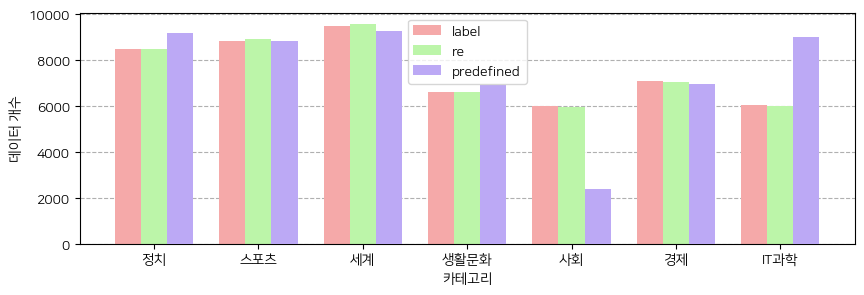

In [157]:
fig, axes = plt.subplots(figsize=(10,3))
plt.grid(visible=True, axis='y', linestyle='--', zorder=0)

counter = Counter(ex.label_text)
counter = dict(sorted(counter.items()))
x = list(counter.keys())[::-1]
y = list(counter.values())[::-1]
print(len(x))

counter = Counter(ex.refactor_label)
counter = dict(sorted(counter.items()))
x = list(counter.keys())[::-1]
y2 = list(counter.values())[::-1]

counter = Counter(ex.predefined_news_category)
counter = dict(sorted(counter.items()))
x = list(counter.keys())[::-1]
y3 = list(counter.values())[::-1]

bar_width = 0.25

index = np.arange(7)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, y, bar_width, color='#F5A9A9', label='label', zorder=2)
b2 = plt.bar(index + bar_width, y2, bar_width,color='#BCF5A9', label='re', zorder=2)
b3 = plt.bar(index + bar_width+bar_width, y3, bar_width,color='#BCA9F5', label='predefined', zorder=3)
plt.xticks(np.arange(bar_width, len(x) + bar_width, 1), x)

plt.xlabel('카테고리', size = 10)
plt.ylabel('데이터 개수', size = 10)
plt.legend()
plt.show()


# 국립국어원 외부 데이터 사용

- dataset: 신문 말뭉치 2022
- author: 국립국어원
- repository: https://corpus.korean.go.kr

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import json

from collections import Counter
from tqdm import tqdm
from hanspell import spell_checker
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import warnings
# 경고메세지 끄기
warnings.filterwarnings(action='ignore')
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist
path = '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf' # fontlist에 있던 경로입니다
font_name = fm.FontProperties(fname=path).get_name()
font_name
plt.rcParams['font.family'] =font_name
plt.rcParams['axes.unicode_minus'] =False


In [3]:
import os
root_path = '/opt/ml/level2_nlp_datacentric-nlp-02'
data_path = root_path+'/data/others/'
dir_list = os.listdir(data_path)
dir_list.sort()
len(dir_list)


34

### 데이터셋 소분류별 분포

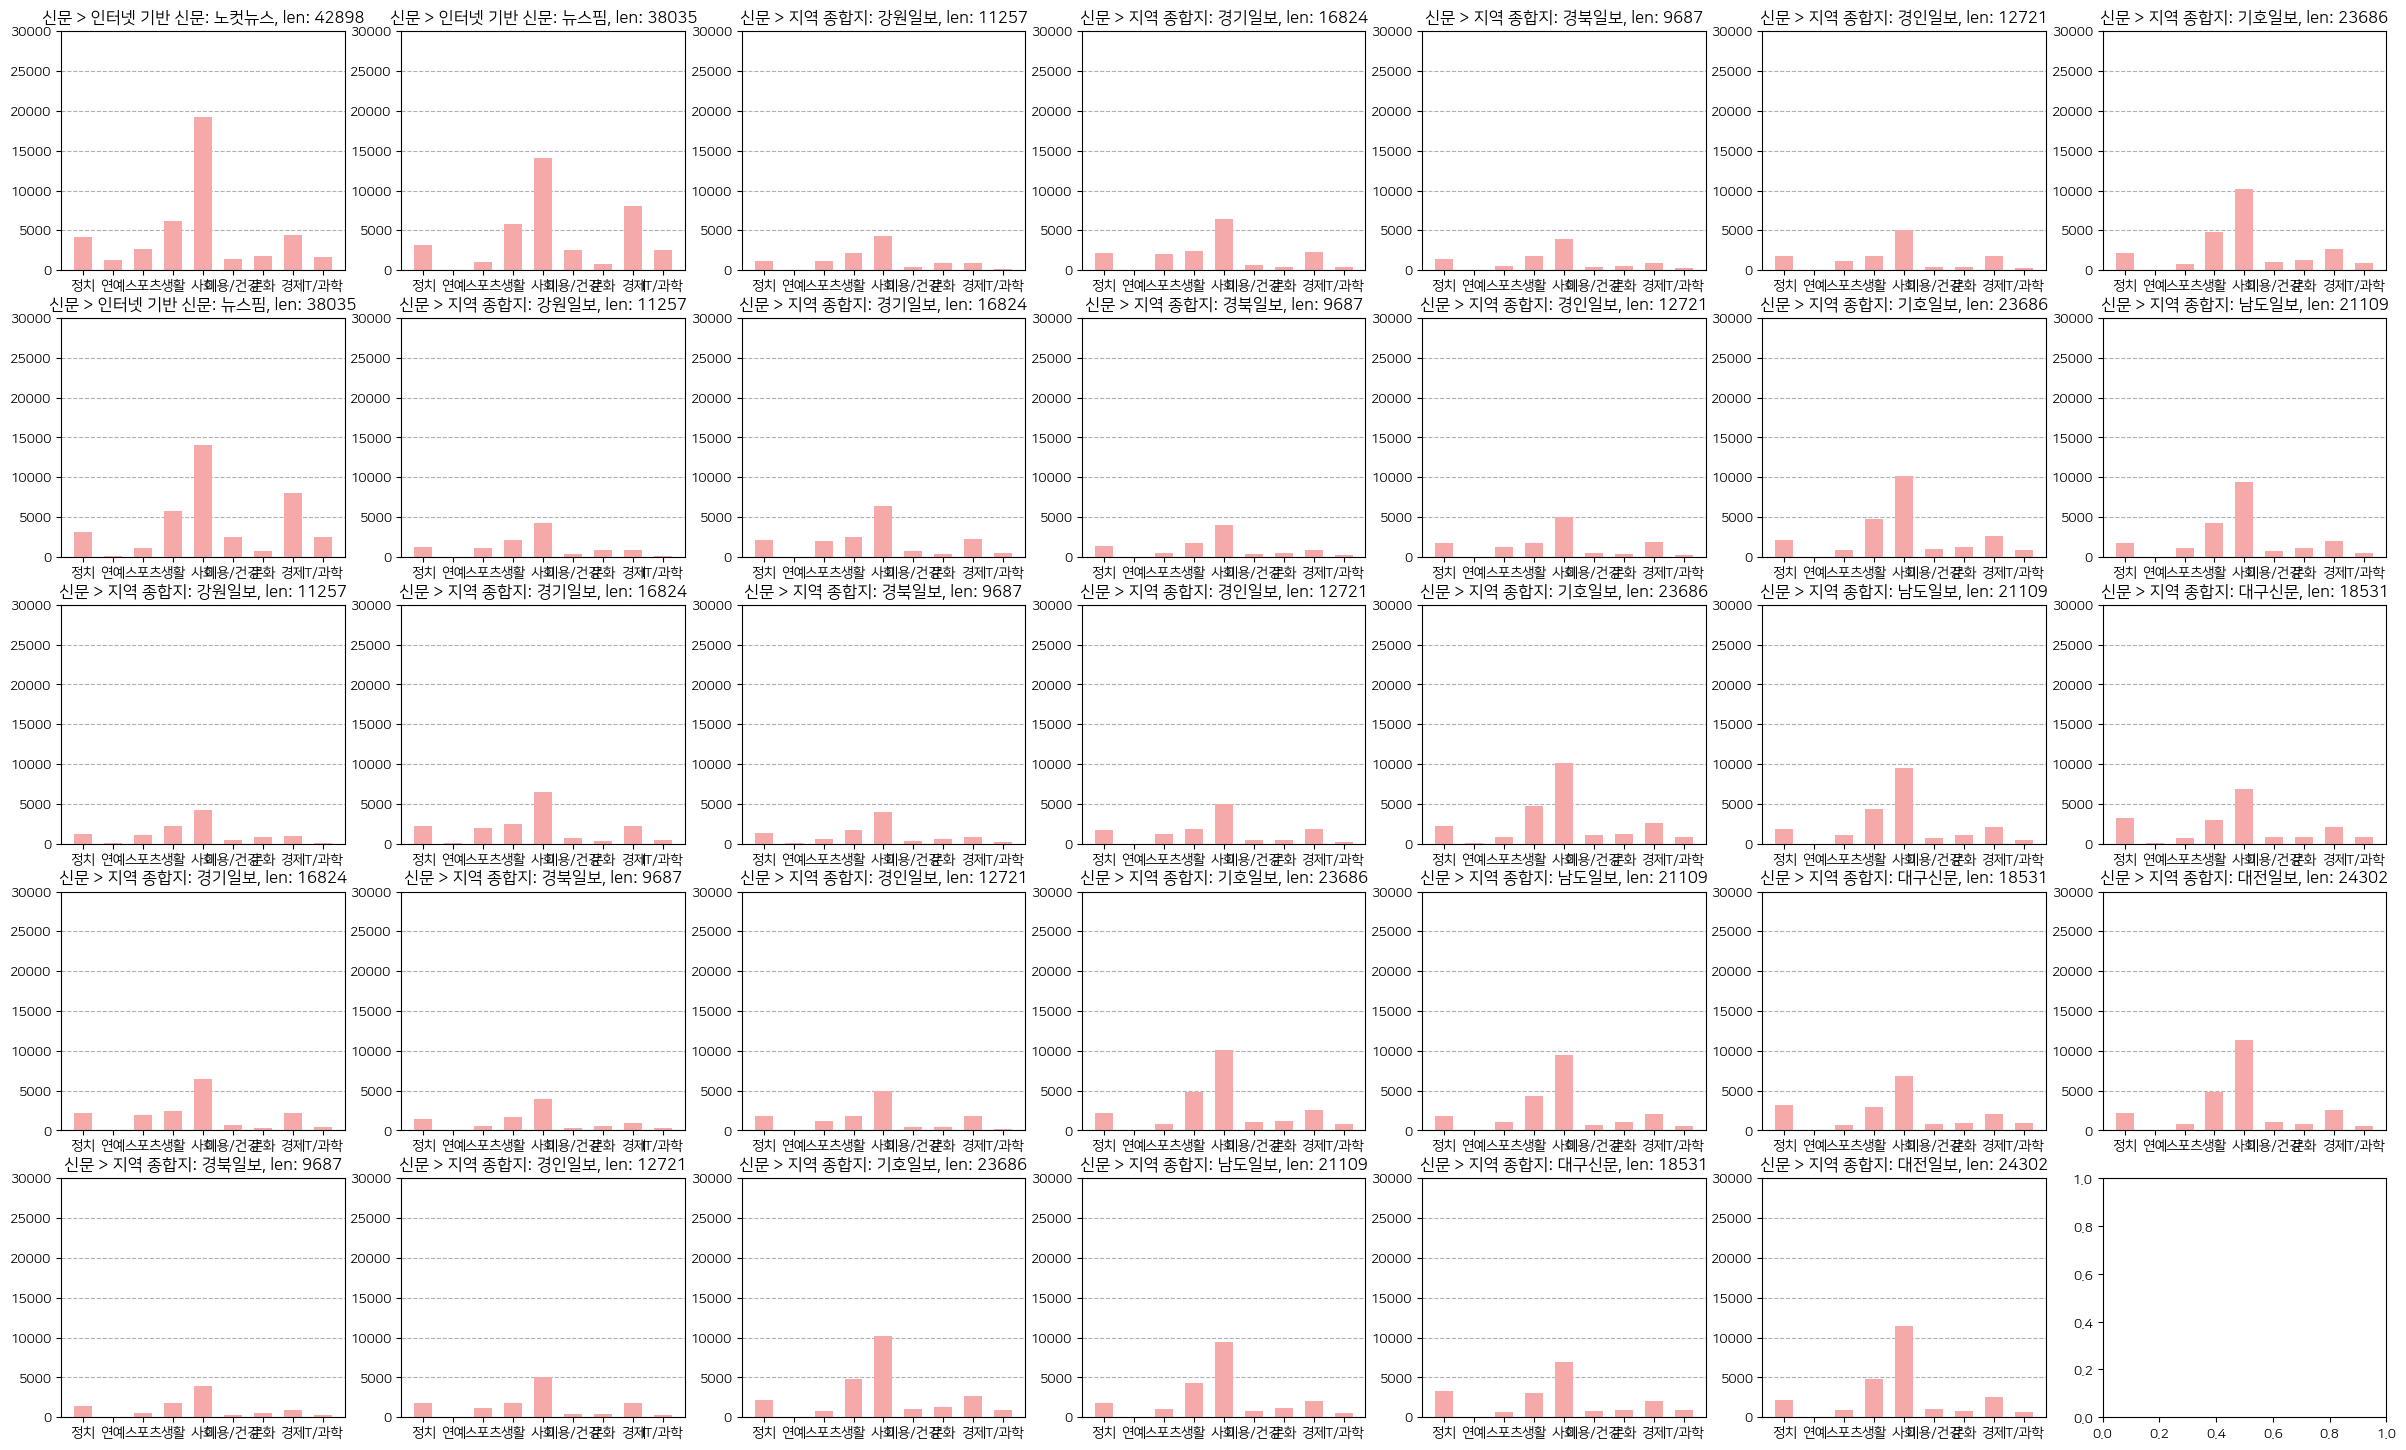

In [5]:
train = pd.DataFrame()
len_news = 0
fig, axes = plt.subplots(5,7, figsize=(30,18))
ids = 0
for i in range(5):
    for j in range(7):
        if i==4 and j==6:
            break

        js_path = data_path + dir_list[i+j]
        with open(js_path) as f:
            js = json.loads(f.read())
        # print(js['metadata']['category'])
        ID = []
        input_text = []
        label_text = []
        js_doc = js['document']
        ref = js_doc[0]['metadata']['publisher']
        for ids in range(len(js_doc)):
            data = js_doc[ids]
            ID.append(data['id'])
            label_text.append(data['metadata']['topic'])
            input_text.append(data['paragraph'][0]['form'])
        train_df = {}
        train_df['ID'] = ID
        train_df['text'] = input_text
        train_df['target'] = label_text
        train_df = pd.DataFrame.from_dict(train_df)
        # train = concat([train,train_df, ignore_index=True)
        train = pd.concat([train, train_df], ignore_index=True)
        

        axes[i,j].grid(visible=True, axis='y', linestyle='--', zorder=0)
        counter = Counter(train_df.target)
        counter = dict(sorted(counter.items()))
        x = list(counter.keys())[::-1]
        y = list(counter.values())[::-1]
        # print(len(x))
        bar_width = 0.6
        index = np.arange(len(x))
        axes[i,j].set_ylim([0, 30000])
        axes[i,j].bar(x, y, bar_width, color='#F5A9A9', label='label', zorder=2)
        # axes[i,j].set_xlabel('카테고리')
        # axes[i,j].set_ylabel('데이터 개수')
        axes[i,j].set_title(js['metadata']['category']+': '+ref+', len: '+str(len(train_df)))
        # axes[i,j].text(.25,.25,js['metadata']['category']+', len: '+str(len(x)),
        #     horizontalalignment='left',
        #     verticalalignment='top',
        #     transform=axes[i,j].transAxes)
        # axes[i,j].legend()
        len_news+= len(train_df)

plt.show()

In [6]:
train.head()

,ID,text,target
0,NIRW2200000001.1,고창·부안·김포·경주 농장서 고병원성 AI 의심사례 확인,사회
1,NIRW2200000001.2,"美·英, 새해 앞두고 코로나 ‘역대 최악’ 기록",사회
2,NIRW2200000001.3,"美, 유통한계-佛, 불신…백신 접종 속도 더딘 이유",사회
3,NIRW2200000001.4,"WHO, 화이자 코로나19 백신 긴급사용 승인",미용/건강
4,NIRW2200000001.5,힘차게 떠오른 신축년 첫 해…간절곶 구름 인파 자취 감춰,사회


In [7]:
print(len(train))
print(len_news)

639138
639138


## 전체 데이터 분포

9


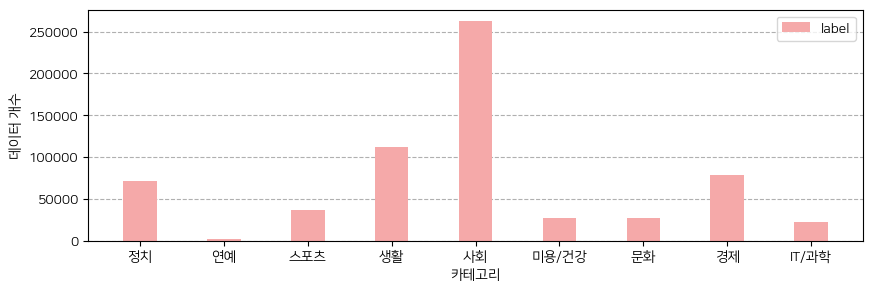

In [9]:
fig, axes = plt.subplots(figsize=(10,3))
plt.grid(visible=True, axis='y', linestyle='--', zorder=0)
counter = Counter(train.target)
counter = dict(sorted(counter.items()))
x = list(counter.keys())[::-1]
y = list(counter.values())[::-1]
print(len(x))
bar_width = 0.4
index = np.arange(len(x))
b1 = plt.bar(x, y, bar_width, color='#F5A9A9', label='label', zorder=2)
plt.xlabel('카테고리', size = 10)
plt.ylabel('데이터 개수', size = 10)
plt.legend()
plt.show()


## 데이터 확인

In [10]:
train = pd.DataFrame()
for i in range(len(dir_list)):
    js_path = data_path + dir_list[i]
    with open(js_path) as f:
        js = json.loads(f.read())
    print(js['metadata']['category'],end=', ')
    ID = []
    input_text = []
    label_text = []
    title = []
    date=[]
    original_topic = []
    publisher=[]
    js_doc = js['document']
    for ids in range(len(js_doc)):
        data = js_doc[ids]
        ID.append(data['id'])
        label_text.append(data['metadata']['topic'])
        input_text.append(data['paragraph'][0]['form'])
        title.append(data['metadata']['title'])
        publisher.append(data['metadata']['publisher'])
        date.append(data['metadata']['date'])
        original_topic.append(data['metadata']['original_topic'])
    train_df = {}
    train_df['ID'] = ID
    train_df['text'] = input_text
    train_df['target'] = label_text
    train_df['date'] = date
    train_df['분류'] = [js['metadata']['category'] for _ in range(len(train_df['ID']))]

    train_df['title'] = title
    train_df['publisher'] = publisher
    

    train_df['original_topic'] = original_topic
    # train_df['title'] = title
    


    train_df = pd.DataFrame.from_dict(train_df)
    train = pd.concat([train, train_df], ignore_index=True)


신문 > 인터넷 기반 신문, 신문 > 인터넷 기반 신문, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 지역 종합지, 신문 > 전문지, 신문 > 전문지, 신문 > 전문지, 신문 > 전문지, 신문 > 전문지, 신문 > 전문지, 신문 > 전문지, 신문 > 전문지, 신문 > 전국 종합지, 신문 > 전국 종합지, 신문 > 전국 종합지, 신문 > 전국 종합지, 신문 > 전국 종합지, 신문 > 전국 종합지, 신문 > 기타, 

In [11]:
train.head()

,ID,text,target,date,분류,title,publisher,original_topic
0,NIRW2200000001.1,고창·부안·김포·경주 농장서 고병원성 AI 의심사례 확인,사회,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"지역,전북|지역,경기|지역,전남"
1,NIRW2200000001.2,"美·英, 새해 앞두고 코로나 ‘역대 최악’ 기록",사회,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"국제,미국_북미|국제,유럽_EU|"
2,NIRW2200000001.3,"美, 유통한계-佛, 불신…백신 접종 속도 더딘 이유",사회,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"국제,유럽_EU|사회,의료_건강|"
3,NIRW2200000001.4,"WHO, 화이자 코로나19 백신 긴급사용 승인",미용/건강,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"IT_과학,IT_과학일반||"
4,NIRW2200000001.5,힘차게 떠오른 신축년 첫 해…간절곶 구름 인파 자취 감춰,사회,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"지역,경남|지역,대구|지역,부산"


In [12]:
train['publisher'].unique()

array(['노컷뉴스', '뉴스핌', '강원일보', '경기일보', '경북일보', '경인일보', '기호일보', '남도일보',
       '대구신문', '대전일보', '동양일보', '매일신문', '부산일보', '전남일보', '전북도민일보', '중도일보',
       '충북일보', '충청일보', '충청투데이', '머니투데이', '서울경제', '스포츠서울', '아시아경제', '아주경제',
       '이데일리', '이투데이', '헤럴드경제', '국민일보', '내일신문', '서울신문', '조선일보', '한겨레',
       '한국일보', '미디어오늘'], dtype=object)

In [13]:
train.isnull().sum()

ID                0
text              0
target            0
date              0
분류                0
title             0
publisher         0
original_topic    0
dtype: int64

In [14]:
print('원래 데이터 개수: ',len(train))
df_j = train[['text']].drop_duplicates().index
print('중복 제거된 데이터 개수: ',len(train)-len(df_j))
print('최종 데이터 개수: ',len(df_j))

원래 데이터 개수:  978342
중복 제거된 데이터 개수:  10303
최종 데이터 개수:  968039


`결측치 확인 및 중복값 확인`

In [15]:
list(train['target'].unique())

['사회', '미용/건강', '생활', '스포츠', '정치', '경제', '연예', '문화', 'IT/과학']

In [16]:
train.shape

(978342, 8)

In [17]:
p_list = list(train['publisher'].unique())
df_p = pd.DataFrame()
for p in p_list:
    num = len(train[train['publisher']==p])
    # print(p, ': ',num)
    # df_p[p] = num
    df_p.insert(df_p.shape[1],p,[num])
df_p
    

,노컷뉴스,뉴스핌,강원일보,경기일보,경북일보,경인일보,기호일보,남도일보,대구신문,대전일보,동양일보,매일신문,부산일보,전남일보,전북도민일보,중도일보,충북일보,충청일보,충청투데이,머니투데이,서울경제,스포츠서울,아시아경제,아주경제,이데일리,이투데이,헤럴드경제,국민일보,내일신문,서울신문,조선일보,한겨레,한국일보,미디어오늘
0,42898,38035,11257,16824,9687,12721,23686,21109,18531,24302,5756,28902,43346,12984,20929,18550,15331,22641,5410,31288,81698,36780,81389,62383,42015,36114,86252,36180,11572,28702,13591,21912,13297,2270


### 뉴스 출처별 분포 확인

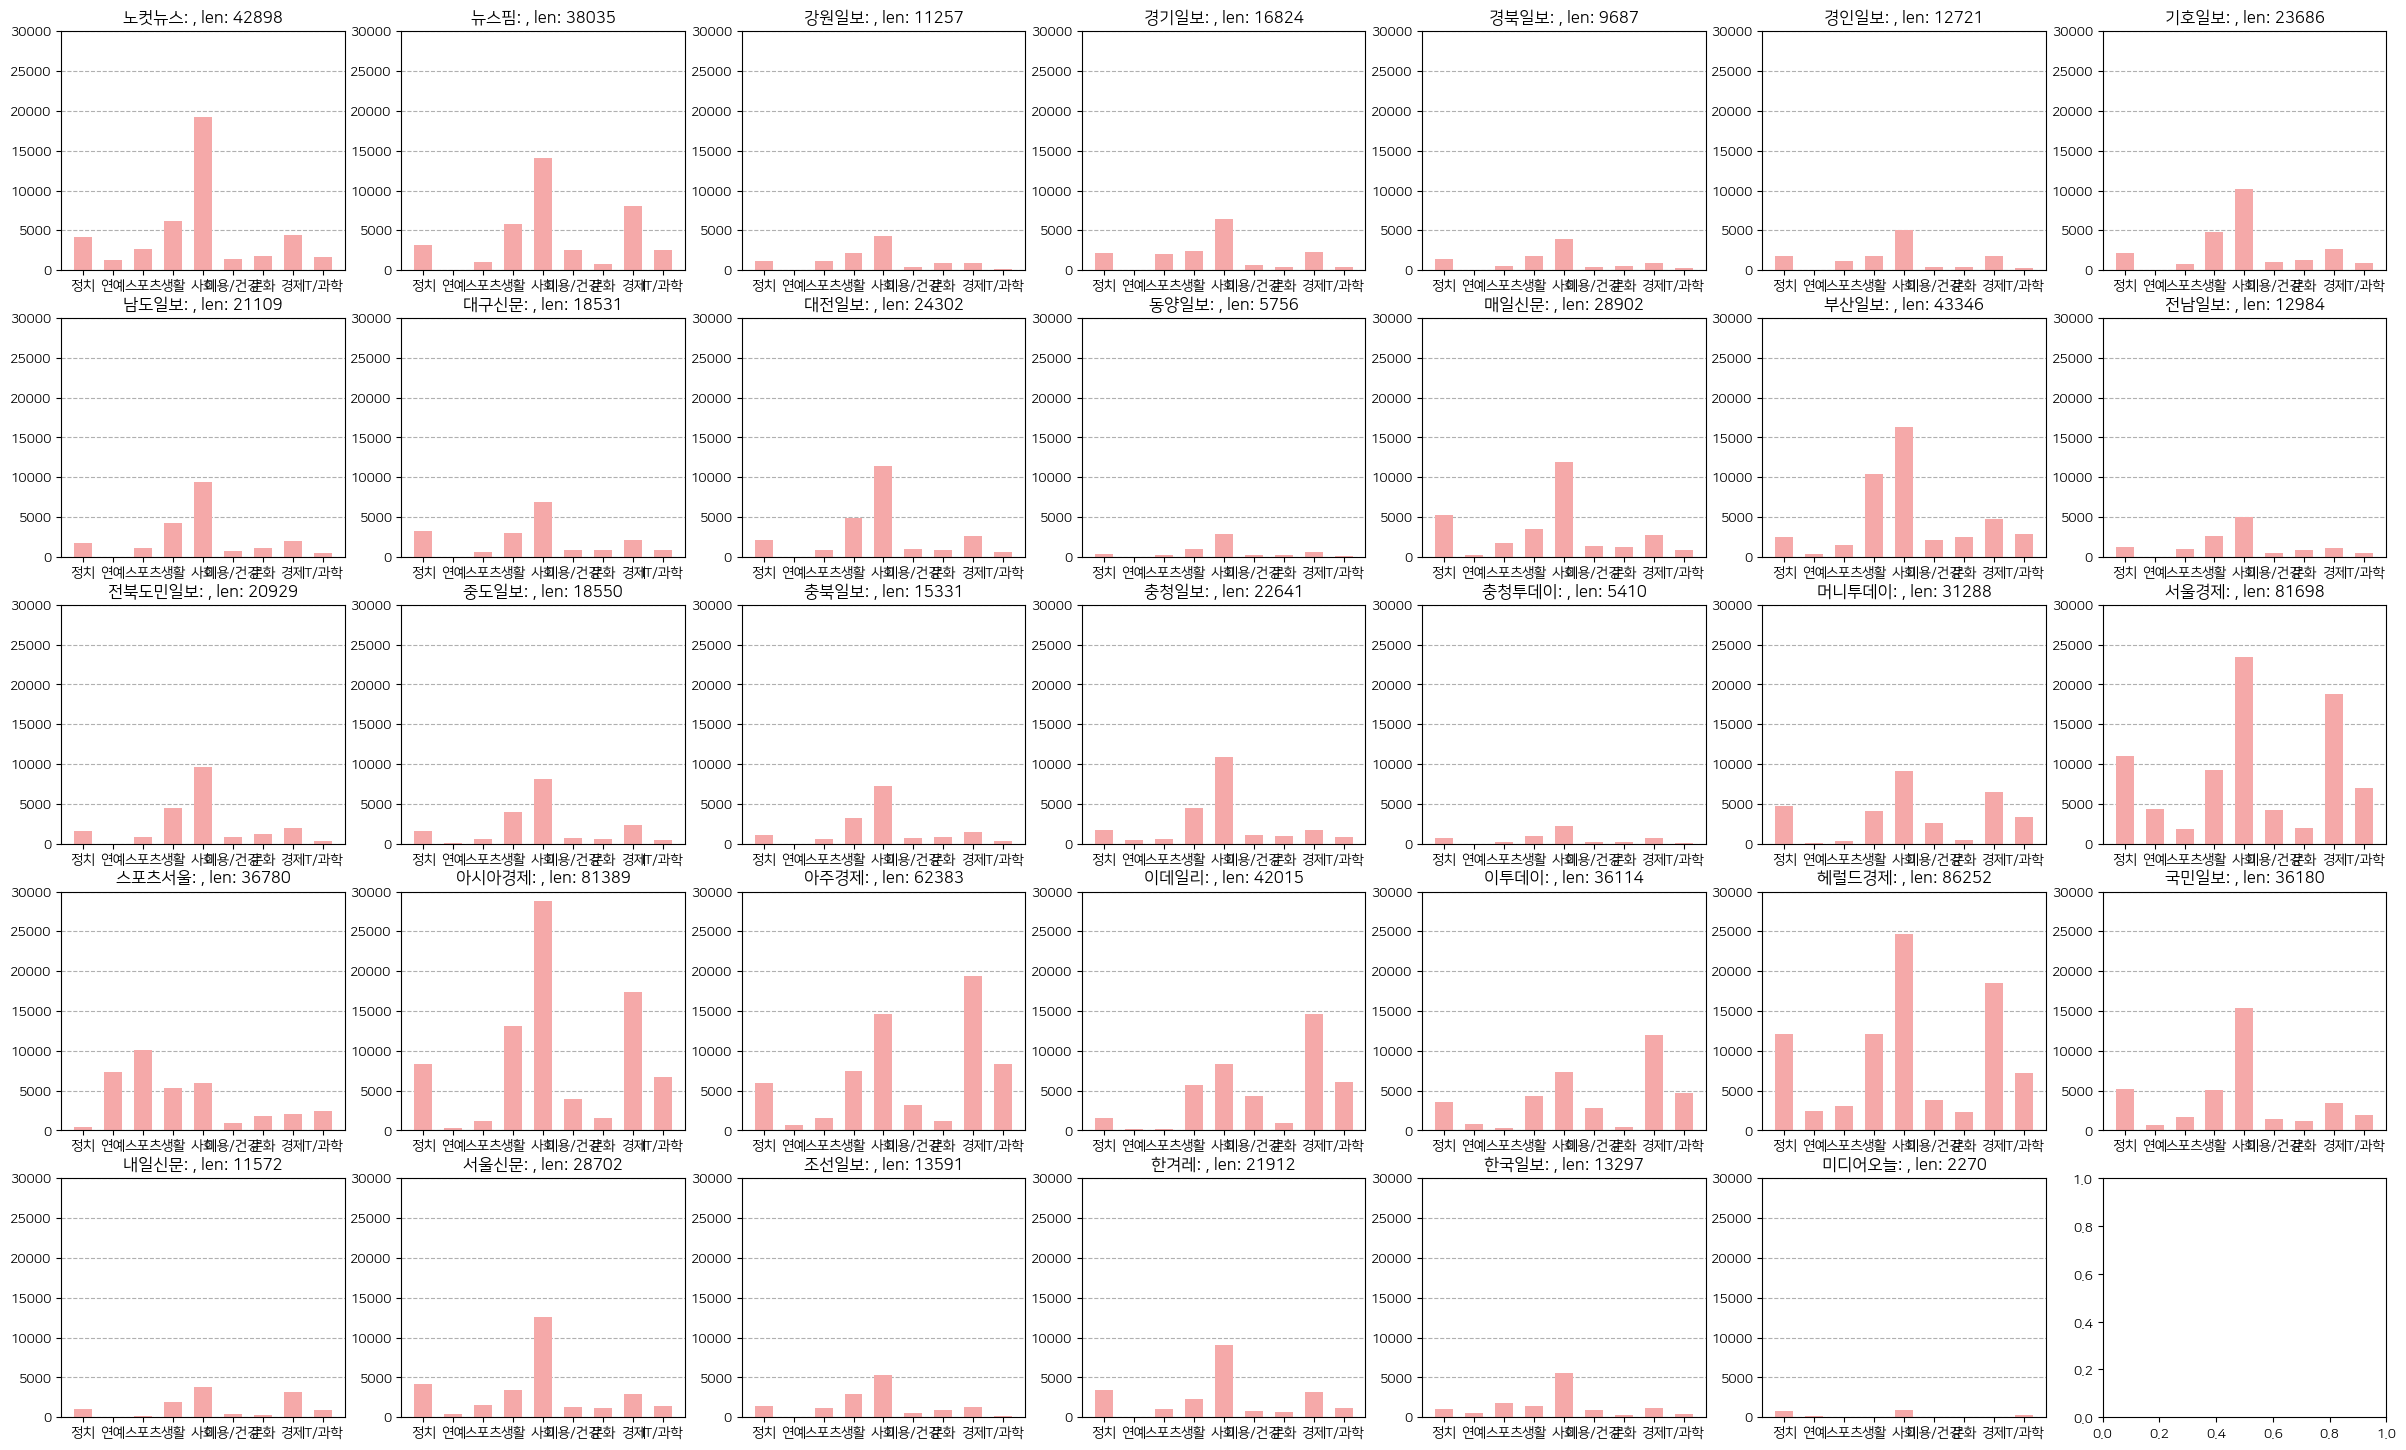

In [18]:
len_news = 0
fig, axes = plt.subplots(5,7, figsize=(30,18))
ids = 0
for i in range(5):
    for j in range(7):
        if i==4 and j==6:
            break

        
        train_df = train[train['publisher']==p_list[ids]]
        axes[i,j].grid(visible=True, axis='y', linestyle='--', zorder=0)
        counter = Counter(train_df.target)
        counter = dict(sorted(counter.items()))
        x = list(counter.keys())[::-1]
        y = list(counter.values())[::-1]
        # print(len(x))
        bar_width = 0.6
        index = np.arange(len(x))
        axes[i,j].set_ylim([0, 30000])
        axes[i,j].bar(x, y, bar_width, color='#F5A9A9', label='label', zorder=2)
        # axes[i,j].set_xlabel('카테고리')
        # axes[i,j].set_ylabel('데이터 개수')
        axes[i,j].set_title(p_list[ids]+': '+', len: '+str(len(train_df)))
        # axes[i,j].text(.25,.25,js['metadata']['category']+', len: '+str(len(x)),
        #     horizontalalignment='left',
        #     verticalalignment='top',
        #     transform=axes[i,j].transAxes)
        # axes[i,j].legend()
        len_news+= len(train_df)
        ids+=1

plt.show()


In [19]:
x,y = [],[]
for i in range(1,12+1):
    i = str(i).zfill(2)
    x.append(i)
    print('2021'+i+'01')
    # print(train[train['date'].between('2021'+i+'01','2021'+i+'31')].head())
    y.append(len(train[train['date'].between('2021'+i+'01','2021'+i+'31')]))

20210101
20210201
20210301
20210401
20210501
20210601
20210701
20210801
20210901
20211001
20211101
20211201


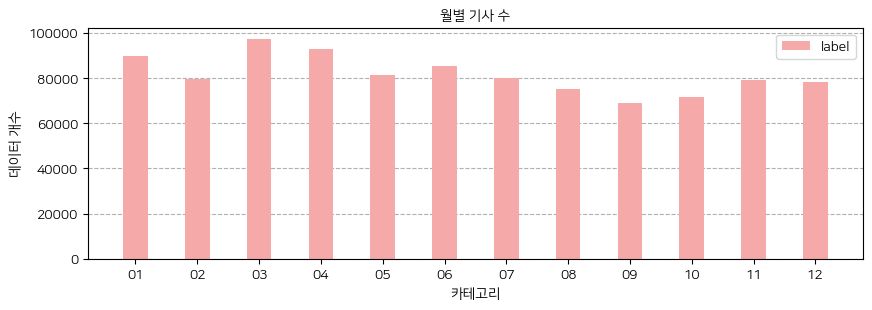

In [20]:
fig, axes = plt.subplots(figsize=(10,3))
plt.grid(visible=True, axis='y', linestyle='--', zorder=0)

bar_width = 0.4
index = np.arange(len(x))
b1 = plt.bar(x, y, bar_width, color='#F5A9A9', label='label', zorder=2)
plt.title('월별 기사 수', size = 10)
plt.xlabel('카테고리', size = 10)
plt.ylabel('데이터 개수', size = 10)
# plt.xticks(rotation=90)
plt.legend()
plt.show()

In [21]:
len(train[train['date']>='20210401'])

711876

### 3월 이후 기사 모집

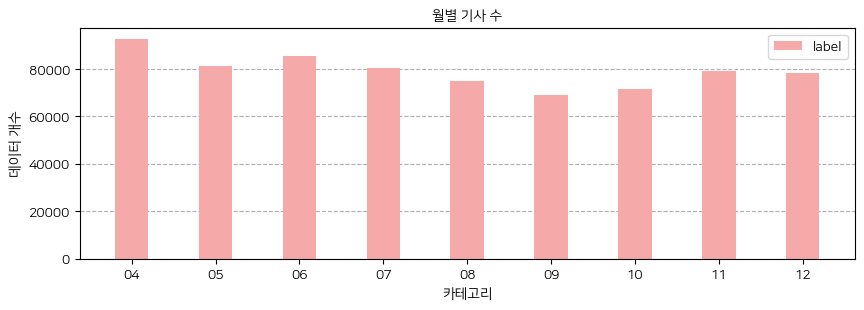

In [22]:
x,y = [],[]
for i in range(4,12+1):
    i = str(i).zfill(2)
    x.append(i)

    y.append(len(train[train['date'].between('2021'+i+'01','2021'+i+'31')]))
fig, axes = plt.subplots(figsize=(10,3))
plt.grid(visible=True, axis='y', linestyle='--', zorder=0)

bar_width = 0.4
index = np.arange(len(x))
b1 = plt.bar(x, y, bar_width, color='#F5A9A9', label='label', zorder=2)
plt.title('월별 기사 수', size = 10)
plt.xlabel('카테고리', size = 10)
plt.ylabel('데이터 개수', size = 10)
# plt.xticks(rotation=90)
plt.legend()
plt.show()

9


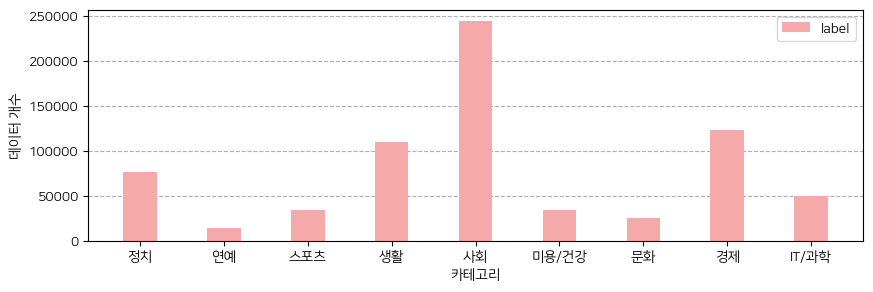

In [23]:
fig, axes = plt.subplots(figsize=(10,3))
plt.grid(visible=True, axis='y', linestyle='--', zorder=0)
counter = Counter(train[train['date']>='20210401'].target)
counter = dict(sorted(counter.items()))
x = list(counter.keys())[::-1]
y = list(counter.values())[::-1]
print(len(x))
bar_width = 0.4
index = np.arange(len(x))
b1 = plt.bar(x, y, bar_width, color='#F5A9A9', label='label', zorder=2)
plt.xlabel('카테고리', size = 10)
plt.ylabel('데이터 개수', size = 10)
plt.legend()
plt.show()

In [24]:
train[train['date']>='20210401'].head()

,ID,text,target,date,분류,title,publisher,original_topic
11138,NIRW2200000001.11139,"화이자 백신, 12~15세에 효과 100%",미용/건강,20210401,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"국제,국제일반||"
11139,NIRW2200000001.11140,보궐선거 직전 미중 상대 외교전…외교투톱 동시 출격,사회,20210401,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"정치,외교|정치,북한|"
11140,NIRW2200000001.11141,"EMA “AZ백신, 특정연령층 혈전유발 증거없어”",미용/건강,20210401,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"사회,사회일반||"
11141,NIRW2200000001.11142,"부산시, ‘청년행복박스’ 참여할 청년 외식사업가 모집",생활,20210401,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"지역,울산|IT_과학,인터넷_SNS|지역,충북"
11142,NIRW2200000001.11143,"부산시, 환경오염물질 불법 배출한 업체 15곳 적발",사회,20210401,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"사회,환경|지역,부산|지역,강원"


'연예' '생활' '미용/건강' '문화' 카테고리를 생활문화로 변경

In [25]:
def label_ch(x):
    if x == '연예' or x == '생활' or x == '미용/건강' or x == '문화' :
        return '생활문화'
    else:
        return x
train_csv = train.copy()
train_csv['target'] = train_csv['target'].apply(label_ch)

In [27]:
train_csv.head()

,ID,text,target,date,분류,title,publisher,original_topic
0,NIRW2200000001.1,고창·부안·김포·경주 농장서 고병원성 AI 의심사례 확인,사회,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"지역,전북|지역,경기|지역,전남"
1,NIRW2200000001.2,"美·英, 새해 앞두고 코로나 ‘역대 최악’ 기록",사회,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"국제,미국_북미|국제,유럽_EU|"
2,NIRW2200000001.3,"美, 유통한계-佛, 불신…백신 접종 속도 더딘 이유",사회,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"국제,유럽_EU|사회,의료_건강|"
3,NIRW2200000001.4,"WHO, 화이자 코로나19 백신 긴급사용 승인",생활문화,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"IT_과학,IT_과학일반||"
4,NIRW2200000001.5,힘차게 떠오른 신축년 첫 해…간절곶 구름 인파 자취 감춰,사회,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"지역,경남|지역,대구|지역,부산"


In [28]:
def label_ch(x):
    if '국제' in x[1]  :
        return '세계'
    else:
        return x[0]
train_csv['target'] = train_csv[['target','original_topic']].apply(label_ch,axis=1)

In [29]:
train_csv.head()

,ID,text,target,date,분류,title,publisher,original_topic
0,NIRW2200000001.1,고창·부안·김포·경주 농장서 고병원성 AI 의심사례 확인,사회,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"지역,전북|지역,경기|지역,전남"
1,NIRW2200000001.2,"美·英, 새해 앞두고 코로나 ‘역대 최악’ 기록",세계,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"국제,미국_북미|국제,유럽_EU|"
2,NIRW2200000001.3,"美, 유통한계-佛, 불신…백신 접종 속도 더딘 이유",세계,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"국제,유럽_EU|사회,의료_건강|"
3,NIRW2200000001.4,"WHO, 화이자 코로나19 백신 긴급사용 승인",생활문화,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"IT_과학,IT_과학일반||"
4,NIRW2200000001.5,힘차게 떠오른 신축년 첫 해…간절곶 구름 인파 자취 감춰,사회,20210101,신문 > 인터넷 기반 신문,노컷뉴스 2021년 기사,노컷뉴스,"지역,경남|지역,대구|지역,부산"


7


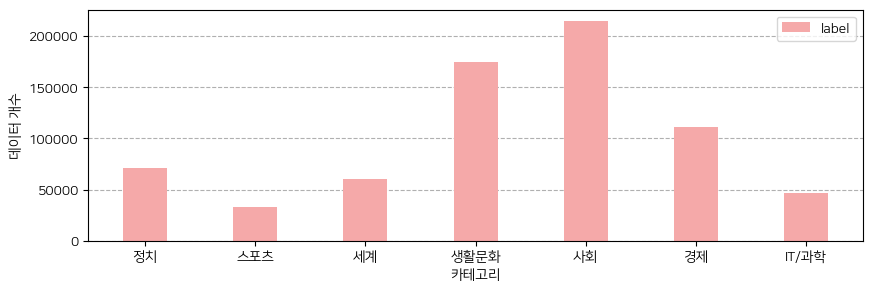

In [30]:
fig, axes = plt.subplots(figsize=(10,3))
plt.grid(visible=True, axis='y', linestyle='--', zorder=0)
counter = Counter(train_csv[train_csv['date']>='20210401'].target)
counter = dict(sorted(counter.items()))
x = list(counter.keys())[::-1]
y = list(counter.values())[::-1]
print(len(x))
bar_width = 0.4
index = np.arange(len(x))
b1 = plt.bar(x, y, bar_width, color='#F5A9A9', label='label', zorder=2)
plt.xlabel('카테고리', size = 10)
plt.ylabel('데이터 개수', size = 10)
plt.legend()
plt.show()

In [32]:
print(x)
len(train_csv[train_csv['target']=='정치'].sample(n=min(y), # number of items from axis to return.
          random_state=42))


['정치', '스포츠', '세계', '생활문화', '사회', '경제', 'IT/과학']


32772

In [33]:
train = pd.DataFrame()

for label in x:
    train_csv[train_csv['target']==label].sample(n=min(y), random_state=42)
    train = pd.concat([train, train_csv[train_csv['target']==label].sample(n=min(y), random_state=42)], ignore_index=True)

In [34]:
len(train)

229404

In [35]:
print('원래 데이터 개수: ',len(train))
df_f_text = train[['ID']].drop_duplicates().index
print('중복 제거된 데이터 개수: ',len(train)-len(df_f_text))

원래 데이터 개수:  229404
중복 제거된 데이터 개수:  0


In [36]:
train.head()

,ID,text,target,date,분류,title,publisher,original_topic
0,NWRW2200000001.8717,오세훈-안철수 단일화룰 합의… 무선 100%·경쟁력+적합도,정치,20210320,신문 > 전국 종합지,국민일보 2021년 기사,국민일보,"정치,선거|정치,국회_정당|"
1,NLRW2200000010.13651,더불어민주당 경북도당 협력의원단 출범식 개최,정치,20210620,신문 > 지역 종합지,매일신문 2021년 기사,매일신문,"정치,국회_정당|지역,경기|정치,북한"
2,NWRW2200000003.4192,부산 후보들 ‘비전 PT’ 날에 ‘조건부 사퇴’ 내건 이언주,정치,20210128,신문 > 전국 종합지,서울신문 2021년 기사,서울신문,"정치,국회_정당|정치,선거|정치,청와대"
3,NPRW2200000001.4484,유영민 비서실장이 밝힌 ‘신현수 파동’의 전말,정치,20210224,신문 > 전문지,머니투데이 2021년 기사,머니투데이,"정치,청와대||"
4,NLRW2200000005.21045,"포천시, 2022년도 본예산 8,960억 편성…올 보다 769억 원 증가",정치,20211121,신문 > 지역 종합지,기호일보 2021년 기사,기호일보,"지역,전북|지역,강원|지역,충남"


In [37]:
train_csv = train.iloc[:,:4]

In [38]:
def label2num(x):
    if x=='정치':
        return 0
    elif x=='경제':
        return 1
    elif x=='사회':
        return 2
    elif x=='생활문화':
        return 3
    elif x=='세계':
        return 4
    elif x=='IT/과학':
        return 5
    elif x=='스포츠':
        return 6

In [39]:
train__ = train_csv.copy()

In [40]:
train__.head()

,ID,text,target,date
0,NWRW2200000001.8717,오세훈-안철수 단일화룰 합의… 무선 100%·경쟁력+적합도,정치,20210320
1,NLRW2200000010.13651,더불어민주당 경북도당 협력의원단 출범식 개최,정치,20210620
2,NWRW2200000003.4192,부산 후보들 ‘비전 PT’ 날에 ‘조건부 사퇴’ 내건 이언주,정치,20210128
3,NPRW2200000001.4484,유영민 비서실장이 밝힌 ‘신현수 파동’의 전말,정치,20210224
4,NLRW2200000005.21045,"포천시, 2022년도 본예산 8,960억 편성…올 보다 769억 원 증가",정치,20211121


In [41]:
counter = Counter(train__.target)
counter = dict(sorted(counter.items()))
print(list(counter.values())[::-1])
print(list(counter.keys())[::-1])

[32772, 32772, 32772, 32772, 32772, 32772, 32772]
['정치', '스포츠', '세계', '생활문화', '사회', '경제', 'IT/과학']


In [42]:
train__['target']=train__['target'].apply(label2num)

In [43]:
train__.head()

,ID,text,target,date
0,NWRW2200000001.8717,오세훈-안철수 단일화룰 합의… 무선 100%·경쟁력+적합도,0,20210320
1,NLRW2200000010.13651,더불어민주당 경북도당 협력의원단 출범식 개최,0,20210620
2,NWRW2200000003.4192,부산 후보들 ‘비전 PT’ 날에 ‘조건부 사퇴’ 내건 이언주,0,20210128
3,NPRW2200000001.4484,유영민 비서실장이 밝힌 ‘신현수 파동’의 전말,0,20210224
4,NLRW2200000005.21045,"포천시, 2022년도 본예산 8,960억 편성…올 보다 769억 원 증가",0,20211121


In [44]:
counter = Counter(train__.target)
counter = dict(sorted(counter.items()))
print(list(counter.values())[::-1])
print(list(counter.keys())[::-1])

[32772, 32772, 32772, 32772, 32772, 32772, 32772]
[6, 5, 4, 3, 2, 1, 0]


In [45]:
train__.iloc[32780]

ID                            NPRW2200000003.17395
text      #‘슈팅 라이크 베컴’ 백승호+4골 폭발 구스타보…전북, 막힌 혈 뚫었다
target                                           6
date                                      20210607
Name: 32780, dtype: object

In [46]:
len(train__)

229404

In [ ]:

train__.to_csv('/opt/ml/level2_nlp_datacentric-nlp-02/data/train_guk2022.csv',

                 sep=',',

                 na_rep='NaN') # do not write index